# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">ĐẶT VÀ TRẢ LỜI CÂU HỎI</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> Thống kê phân tích định giá nhà ở Hà Nội</p>

---

# **Import the package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

---

# **Information of dataset**
- Dataset được lấy từ <a href = "https://www.kaggle.com"> Kaggle </a>. <br>
- Dataset là thông tin giá cả của những căn nhà ở Hà Nội thông qua các đặc điểm của một căn nhà.<br>
- Trang của Dataset <a herf = "https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi"> https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi</a>. <br>
- Tác giả của Dataset: LE ANH DUC. <br>
- License: CC BY-NC-SA 4.0

### Đọc dữ liệu từ file EDA_preprocessing.csv

In [2]:
house_df = pd.read_csv('./csv/EDA_Preprocessing.csv')

In [3]:
display(house_df)

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,86960000.0
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,NaN,NaN,116220000.0
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65000000.0
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100000000.0
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,9.00,4.0,86110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81676,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3.0,38.0,NaN,NaN,81580000.0
81677,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,NaN,NaN,292000000.0
81678,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,NaN,NaN,341460000.0
81679,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,NaN,NaN,101670000.0


In [4]:
pattern = '%Y-%m-%d'
house_df['Date'] = pd.to_datetime(house_df['Date'], format=pattern)

---

# **Đưa ra các câu hỏi cần trả lời:**

### **Câu 1**: Có thể cùng 1 đơn vị diện tích mà giá cả nhà ở Hà Nội lại khác nhau do chiều dài hay chiều rộng?

- **Khi trả lời câu hỏi thành công:** Ta sẽ biết được chiều dài hay chiều rộng, cái nào mới là nhân tố quyết định giá cả của 1 căn nhà.
- **Khó khăn:** Dữ liệu còn rất nhiều outliers, cần phải xử lý nhiều !!!

**Bước 1:** Lấy ra các cột cần sử dụng cho câu hỏi

In [5]:
cols = ['Area', 'Length', 'Width', 'Price/m2']
ques01_df = house_df[cols]
ques01_df

,Area,Length,Width,Price/m2
0,46.0,NaN,NaN,86960000.0
1,37.0,NaN,NaN,116220000.0
2,40.0,10.00,4.0,65000000.0
3,51.0,12.75,4.0,100000000.0
4,36.0,9.00,4.0,86110000.0
...,...,...,...,...
81676,38.0,NaN,NaN,81580000.0
81677,50.0,NaN,NaN,292000000.0
81678,41.0,NaN,NaN,341460000.0
81679,60.0,NaN,NaN,101670000.0


Chúng ta sẽ scale lại 

In [6]:
ques01_df['Price/m2'] = ques01_df['Price/m2'].apply(lambda x: x / 1000000000)
ques01_df = ques01_df.rename(columns= {'Price/m2': 'billion/m2'})
ques01_df

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_59703/1332427629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques01_df['Price/m2'] = ques01_df['Price/m2'].apply(lambda x: x / 1000000000)


,Area,Length,Width,billion/m2
0,46.0,NaN,NaN,0.08696
1,37.0,NaN,NaN,0.11622
2,40.0,10.00,4.0,0.06500
3,51.0,12.75,4.0,0.10000
4,36.0,9.00,4.0,0.08611
...,...,...,...,...
81676,38.0,NaN,NaN,0.08158
81677,50.0,NaN,NaN,0.29200
81678,41.0,NaN,NaN,0.34146
81679,60.0,NaN,NaN,0.10167


**Bước 2:** Xử lý các dữ liệu liệu NaN

In [7]:
ques01_df = ques01_df.loc[ques01_df['Length'].isnull() != True]
ques01_df = ques01_df.loc[ques01_df['Width'].isnull() != True]
ques01_df

,Area,Length,Width,billion/m2
2,40.0,10.00,4.0,0.06500
3,51.0,12.75,4.0,0.10000
4,36.0,9.00,4.0,0.08611
5,46.0,12.10,3.8,0.10435
8,75.0,12.00,6.5,0.12000
...,...,...,...,...
81540,37.0,13.00,3.0,0.04324
81541,100.0,16.00,6.0,0.11500
81544,80.0,14.00,5.0,0.26250
81546,89.0,20.00,4.0,0.25843


Dữ liệu có đa số chiều dài chiều rộng của căn nhà, ta sẽ scale lại các độ dài đó tương ứng như sau: <br>
- (1000,): lớn hơn hoặc bằng 1000m
- (900, 1000): [900,1000)
- (800, 900): [800,900)
- ...
- (0,100): (0,100)
- (0,0): bằng 0

**Bước 3:** Scale lại dữ liệu và thêm các cột mới

In [8]:
def scaling_range(x):  
    if x > 1000.0:
        return (1000,)
    elif x == (0.0):
        return (0,0)
    else:
        return (x // 100 * 100, x // 100 * 100 + 100)

In [9]:
ques01_df_width = pd.DataFrame({'scaling_width': ques01_df['Width'].apply(scaling_range)})
ques01_df = pd.concat([ques01_df, ques01_df_width], axis= 1)
ques01_df_Length = pd.DataFrame({'scaling_length': ques01_df['Length'].apply(scaling_range)})
ques01_df = pd.concat([ques01_df, ques01_df_Length], axis= 1)
ques01_df

,Area,Length,Width,billion/m2,scaling_width,scaling_length
2,40.0,10.00,4.0,0.06500,"(0.0, 100.0)","(0.0, 100.0)"
3,51.0,12.75,4.0,0.10000,"(0.0, 100.0)","(0.0, 100.0)"
4,36.0,9.00,4.0,0.08611,"(0.0, 100.0)","(0.0, 100.0)"
5,46.0,12.10,3.8,0.10435,"(0.0, 100.0)","(0.0, 100.0)"
8,75.0,12.00,6.5,0.12000,"(0.0, 100.0)","(0.0, 100.0)"
...,...,...,...,...,...,...
81540,37.0,13.00,3.0,0.04324,"(0.0, 100.0)","(0.0, 100.0)"
81541,100.0,16.00,6.0,0.11500,"(0.0, 100.0)","(0.0, 100.0)"
81544,80.0,14.00,5.0,0.26250,"(0.0, 100.0)","(0.0, 100.0)"
81546,89.0,20.00,4.0,0.25843,"(0.0, 100.0)","(0.0, 100.0)"


**Bước 4:** Trực quan hoá dữ liệu

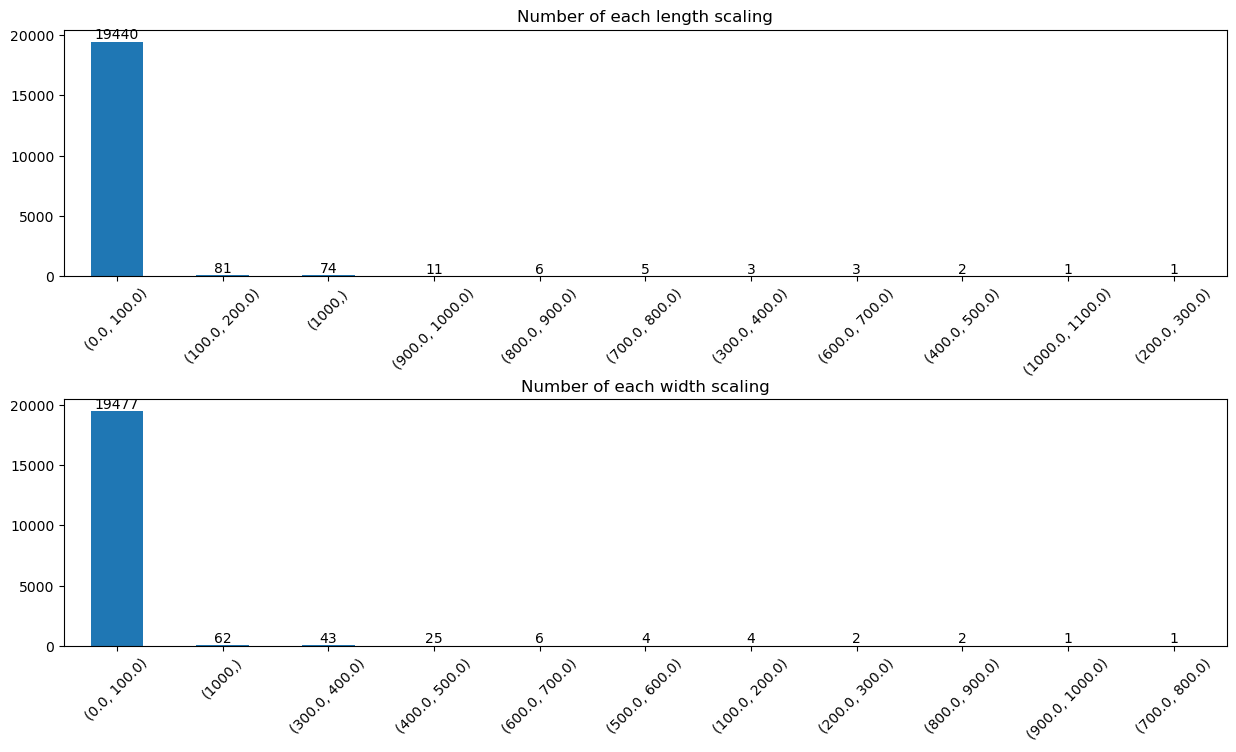

In [10]:
length_df = ques01_df['scaling_length'].value_counts()
width_df  = ques01_df['scaling_width'].value_counts()

# plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 8))
length_df.plot.bar(ax = axes[0], rot = 45)
axes[0].set_title('Number of each length scaling')
plt.subplots_adjust(hspace = 0.5)
width_df.plot.bar(ax = axes[1], rot = 45)
axes[1].set_title('Number of each width scaling')

for i in axes[0].containers:
    axes[0].bar_label(i,)
    
for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

Ta thấy có vẻ như chiều dài và chiều rộng chiếm đa số vào từ (0,100). Ta sẽ chú ý phân tích vào các độ dài này để có dự đoán chính xác hơn !

**Bước 5:** Ta sẽ lọc dữ liệu lại và tiếp tục scale độ dài lại như sau:
- (90, 100): [90,100)
- (80, 90): [80,90)
- ...
- (0,10): (0,10)
- (0,0): bằng 0

In [11]:
def scaling_range_10(x):  
    if x == (0.0):
        return (0.0, 0.0)
    else:
        return (x // 10 * 10, x // 10 * 10 + 10)

In [12]:
ques01_df = house_df[cols]

ques01_df['Price/m2'] = ques01_df['Price/m2'].apply(lambda x: x / 1000000000)
ques01_df = ques01_df.rename(columns= {'Price/m2': 'billion/m2'})

ques01_df = ques01_df.loc[(ques01_df['Length'].isnull() != True) & (ques01_df['Length'] < 100.0)] 
ques01_df = ques01_df.loc[(ques01_df['Width'].isnull() != True) & (ques01_df['Width'] < 100.0)]

ques01_df_width_10 = pd.DataFrame({'scaling_width': ques01_df['Width'].apply(scaling_range_10)}).sort_index()
ques01_df = pd.concat([ques01_df, ques01_df_width_10], axis= 1)
ques01_df_length_10 = pd.DataFrame({'scaling_length': ques01_df['Length'].apply(scaling_range_10)}).sort_index()
ques01_df = pd.concat([ques01_df, ques01_df_length_10], axis= 1)

ques01_df.scaling_width = ques01_df.scaling_width.astype(str)
ques01_df.scaling_length = ques01_df.scaling_length.astype(str)

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_59703/475764856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques01_df['Price/m2'] = ques01_df['Price/m2'].apply(lambda x: x / 1000000000)


**Bước 6:** Trưc quan hoá dữ liệu

In [13]:
heatmap = ques01_df.sort_values(by=['scaling_width', 'scaling_length'])
heatmap = ques01_df.groupby(['scaling_width', 'scaling_length'])['billion/m2'].mean()
heatmap = heatmap.unstack(level= 1)

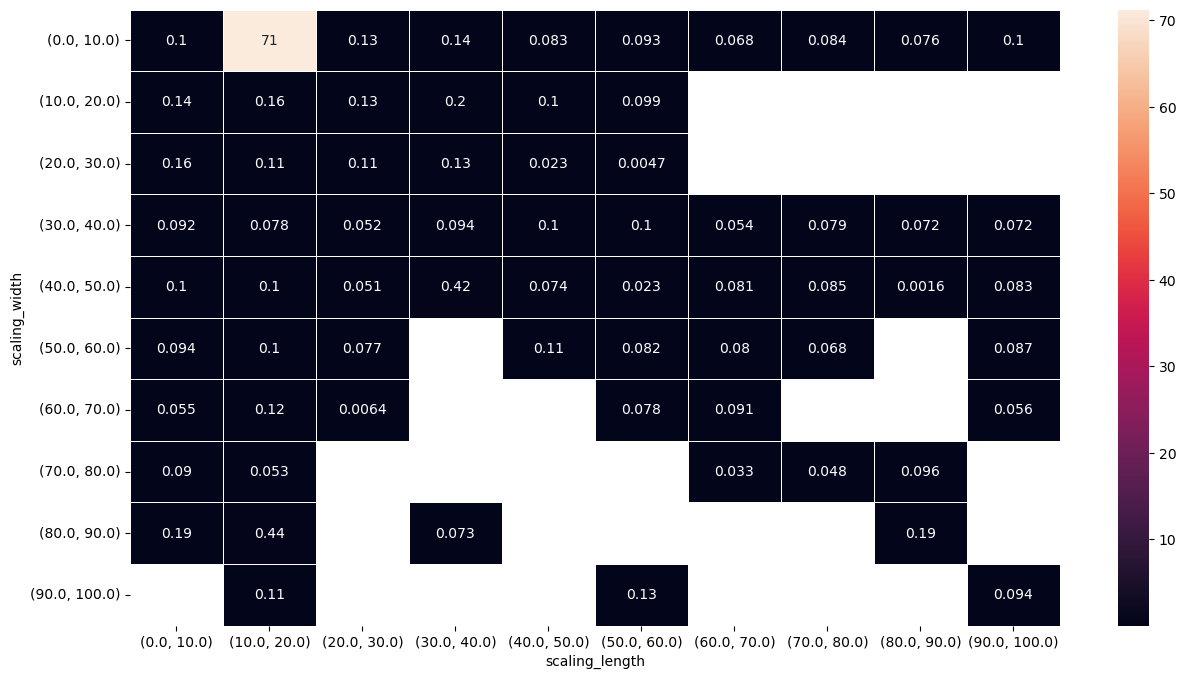

In [14]:
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))    
ax = sns.heatmap(heatmap, linewidths= 0.5, annot= True)

Nhìn qua đồ thị trên, đặc biệt ở căn nhà có chiều rộng là `(0,10)` và chiều dài là `(10,20)` có trung bình tận 71 tỷ/m2.<br>
Có thể dự đoán trong này có outlier, chúng ta sẽ làm rõ hơn.

[Text(0.5, 0, 'Unique prices'), Text(0, 0.5, 'Prices')]

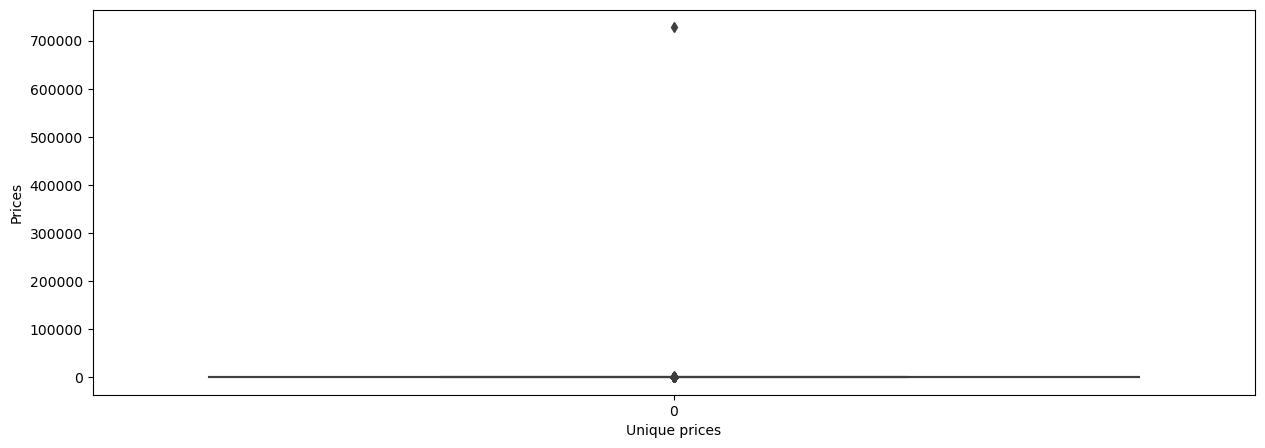

In [15]:
check_outlier = ques01_df.loc[(ques01_df['scaling_length'] == '(10.0, 20.0)') & (ques01_df['scaling_width'] == '(0.0, 10.0)')]
price_df = check_outlier['billion/m2'].unique()

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(data = price_df)
ax.set(xlabel = 'Unique prices', ylabel = 'Prices')

Như dự đoán ta lại có giá trị ngoại lai (700,000 tỷ hơn cho mỗi m2). Ta sẽ loại đi giá trị ngoại lai này bằng cách giới hạn lại giá tiền chỉ rơi vào 100000 tỷ/m2 và trực quan hoá lại biểu đồ

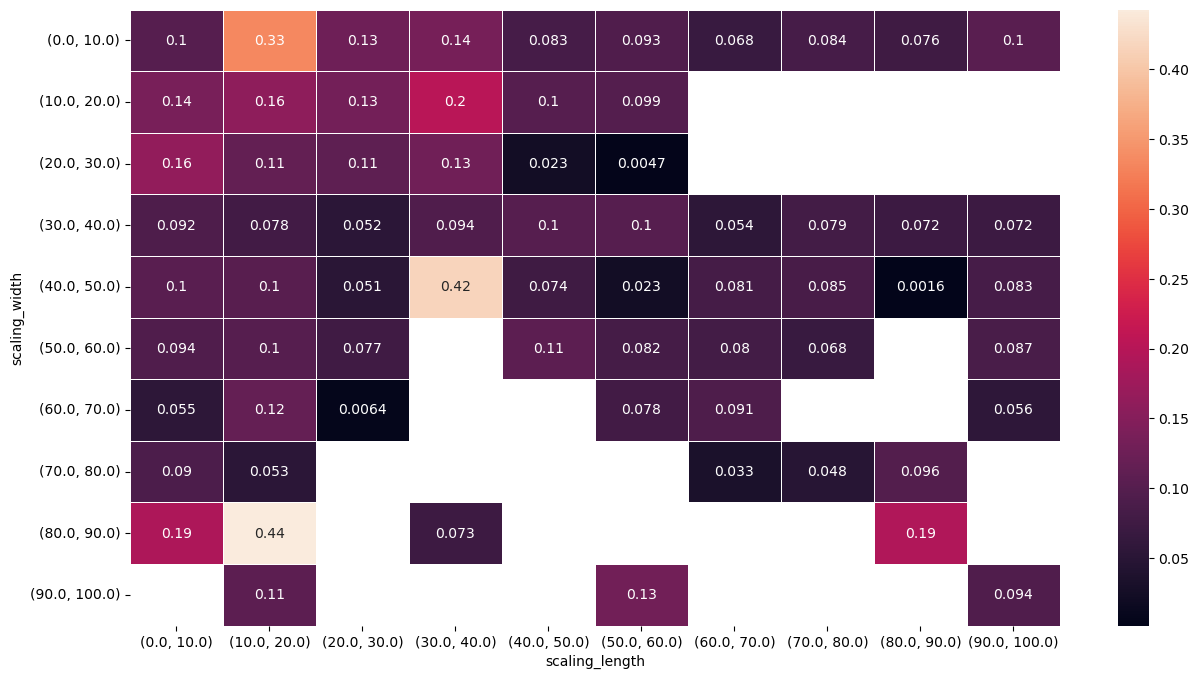

In [16]:
ques01_df = ques01_df.loc[ques01_df['billion/m2'] <= 100000.0]

heatmap = ques01_df.sort_values(by=['scaling_width', 'scaling_length'])
heatmap = ques01_df.groupby(['scaling_width', 'scaling_length'])['billion/m2'].mean()
heatmap = heatmap.unstack(level= 1)

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))    
ax = sns.heatmap(heatmap, linewidths= 0.5, annot= True)

**Nhận xét:** <br>
- Có vẻ như với chiều rộng tầm `(0,10); (10,20); (40,50)` thì ta sẽ có đa dạng nhiều nhất về với chiều dài của nhà. 
- Nhìn chung có vẻ như giá của các nhà có `chiều rộng (0,30)` với `chiều dài (0,40)` giá trung bình có vẻ mắc.
- Với các độ dài đặc biệt như nhận xét đầu thì giá trung bình có vẻ dịu đi.
- Căn có chiều rộng dài trong khoảng lần lượt như: (0,10)(10,20); (80,90)(10,20); (40,50)(30,40) là có giá trung bình nổi trổi nhất.<br>

Qua đây, chúng ta có thể nhận xét có thể do nhu cầu mua đất nhỏ để ở có vẻ nhiều và 3 loại căn nhà có độ dài (0,10)(10,20); (80,90)(10,20); (40,50)(30,40) có thể vẫn là xu hướng trong tương lai

---

### **Câu 2**: Xu hướng các căn nhà được đưa vào mục định giá/ bán sẽ có trạng thái như thế nào ở các thời điểm ?

- **Khi trả lời câu hỏi thành công:** Ta sẽ biết được xu hướng các căn nhà được đưa vào mục định giá/ bán qua thời gian sẽ những thế nào? Như số lượng tầng lầu của căn nhà hay số phòng của căn nhà
- **Khó khăn:** Dữ liệu còn chưa sạch, phải xử lý thêm để trực quan hoá. 

**Bước 1:** Lấy ra các cột sử dụng cho câu hỏi

In [17]:
cols = ['Date', 'Number of bedrooms', 'Number of floors']
ques02_df = house_df[cols]
ques02_df

,Date,Number of bedrooms,Number of floors
0,2020-08-05,5.0,4.0
1,2020-08-05,3.0,NaN
2,2020-08-05,4.0,4.0
3,2020-08-05,6.0,NaN
4,2020-08-05,4.0,NaN
...,...,...,...
81676,2019-08-23,3.0,NaN
81677,2019-08-07,3.0,NaN
81678,2019-08-07,4.0,NaN
81679,2019-08-05,4.0,NaN


**Bước 2:** Xử lý các dữ liệu mang giá trị là NaN và phân cột `Date` thành cột `Month` và `Year` vào dataframe

In [18]:
ques02_df['Year'] = pd.DatetimeIndex(ques02_df['Date']).year
ques02_df['Month'] = pd.DatetimeIndex(ques02_df['Date']).month
ques02_df = ques02_df.fillna(0)
ques02_df

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_59703/2690999072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques02_df['Year'] = pd.DatetimeIndex(ques02_df['Date']).year
/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_59703/2690999072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques02_df['Month'] = pd.DatetimeIndex(ques02_df['Date']).month


,Date,Number of bedrooms,Number of floors,Year,Month
0,2020-08-05,5.0,4.0,2020,8
1,2020-08-05,3.0,0.0,2020,8
2,2020-08-05,4.0,4.0,2020,8
3,2020-08-05,6.0,0.0,2020,8
4,2020-08-05,4.0,0.0,2020,8
...,...,...,...,...,...
81676,2019-08-23,3.0,0.0,2019,8
81677,2019-08-07,3.0,0.0,2019,8
81678,2019-08-07,4.0,0.0,2019,8
81679,2019-08-05,4.0,0.0,2019,8


Chúng ta sẽ kiểm tra xem số năm mà các căn nhà bắt đầu được định giá/ bán

In [19]:
print('Số năm các căn nhà được định giá (đăng bán): ')
print(list(ques02_df['Year'].unique()))

Số năm các căn nhà được định giá (đăng bán): 
[2020, 2019]


Từ đó, ta sẽ lọc dataframe này thành các dataframe con tương ứng. <br>
**Bước 3:** trực quan hoá dữ liệu

<AxesSubplot:xlabel='Number of bedrooms', ylabel='Number of floors'>

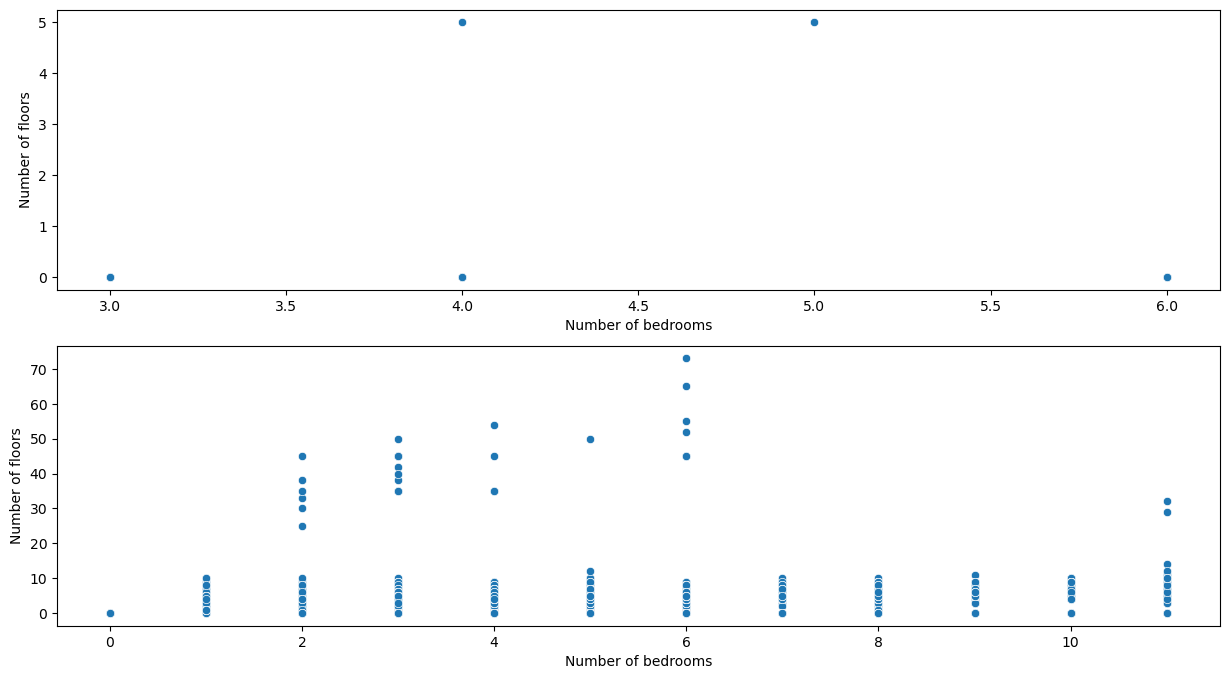

In [20]:
ques02_df_20 = ques02_df.loc[ques02_df['Year'] == 2020]
ques02_df_19 = ques02_df.loc[ques02_df['Year'] == 2019]

# plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 8))

sns.scatterplot(data = ques02_df_19, x = 'Number of bedrooms', y = 'Number of floors', ax = axes[0])
sns.scatterplot(data = ques02_df_20, x = 'Number of bedrooms', y = 'Number of floors', ax = axes[1])

Hmm chúng ta  có thể thấy vào năm 2019 thì có rất ít căn nhà được định giá/ bán. <br>
Để dự đoán được chính xác hơn, chúng ta sẽ quan sát vào năm 2020, đặc biệt là vào các tháng.

**Bước 4:** Chuẩn bị lại dữ liệu và trực quan hoá dữ liệu

<AxesSubplot:title={'center':'Statistics about house grouped by number of bedrooms through months'}, xlabel='Number of bedrooms'>

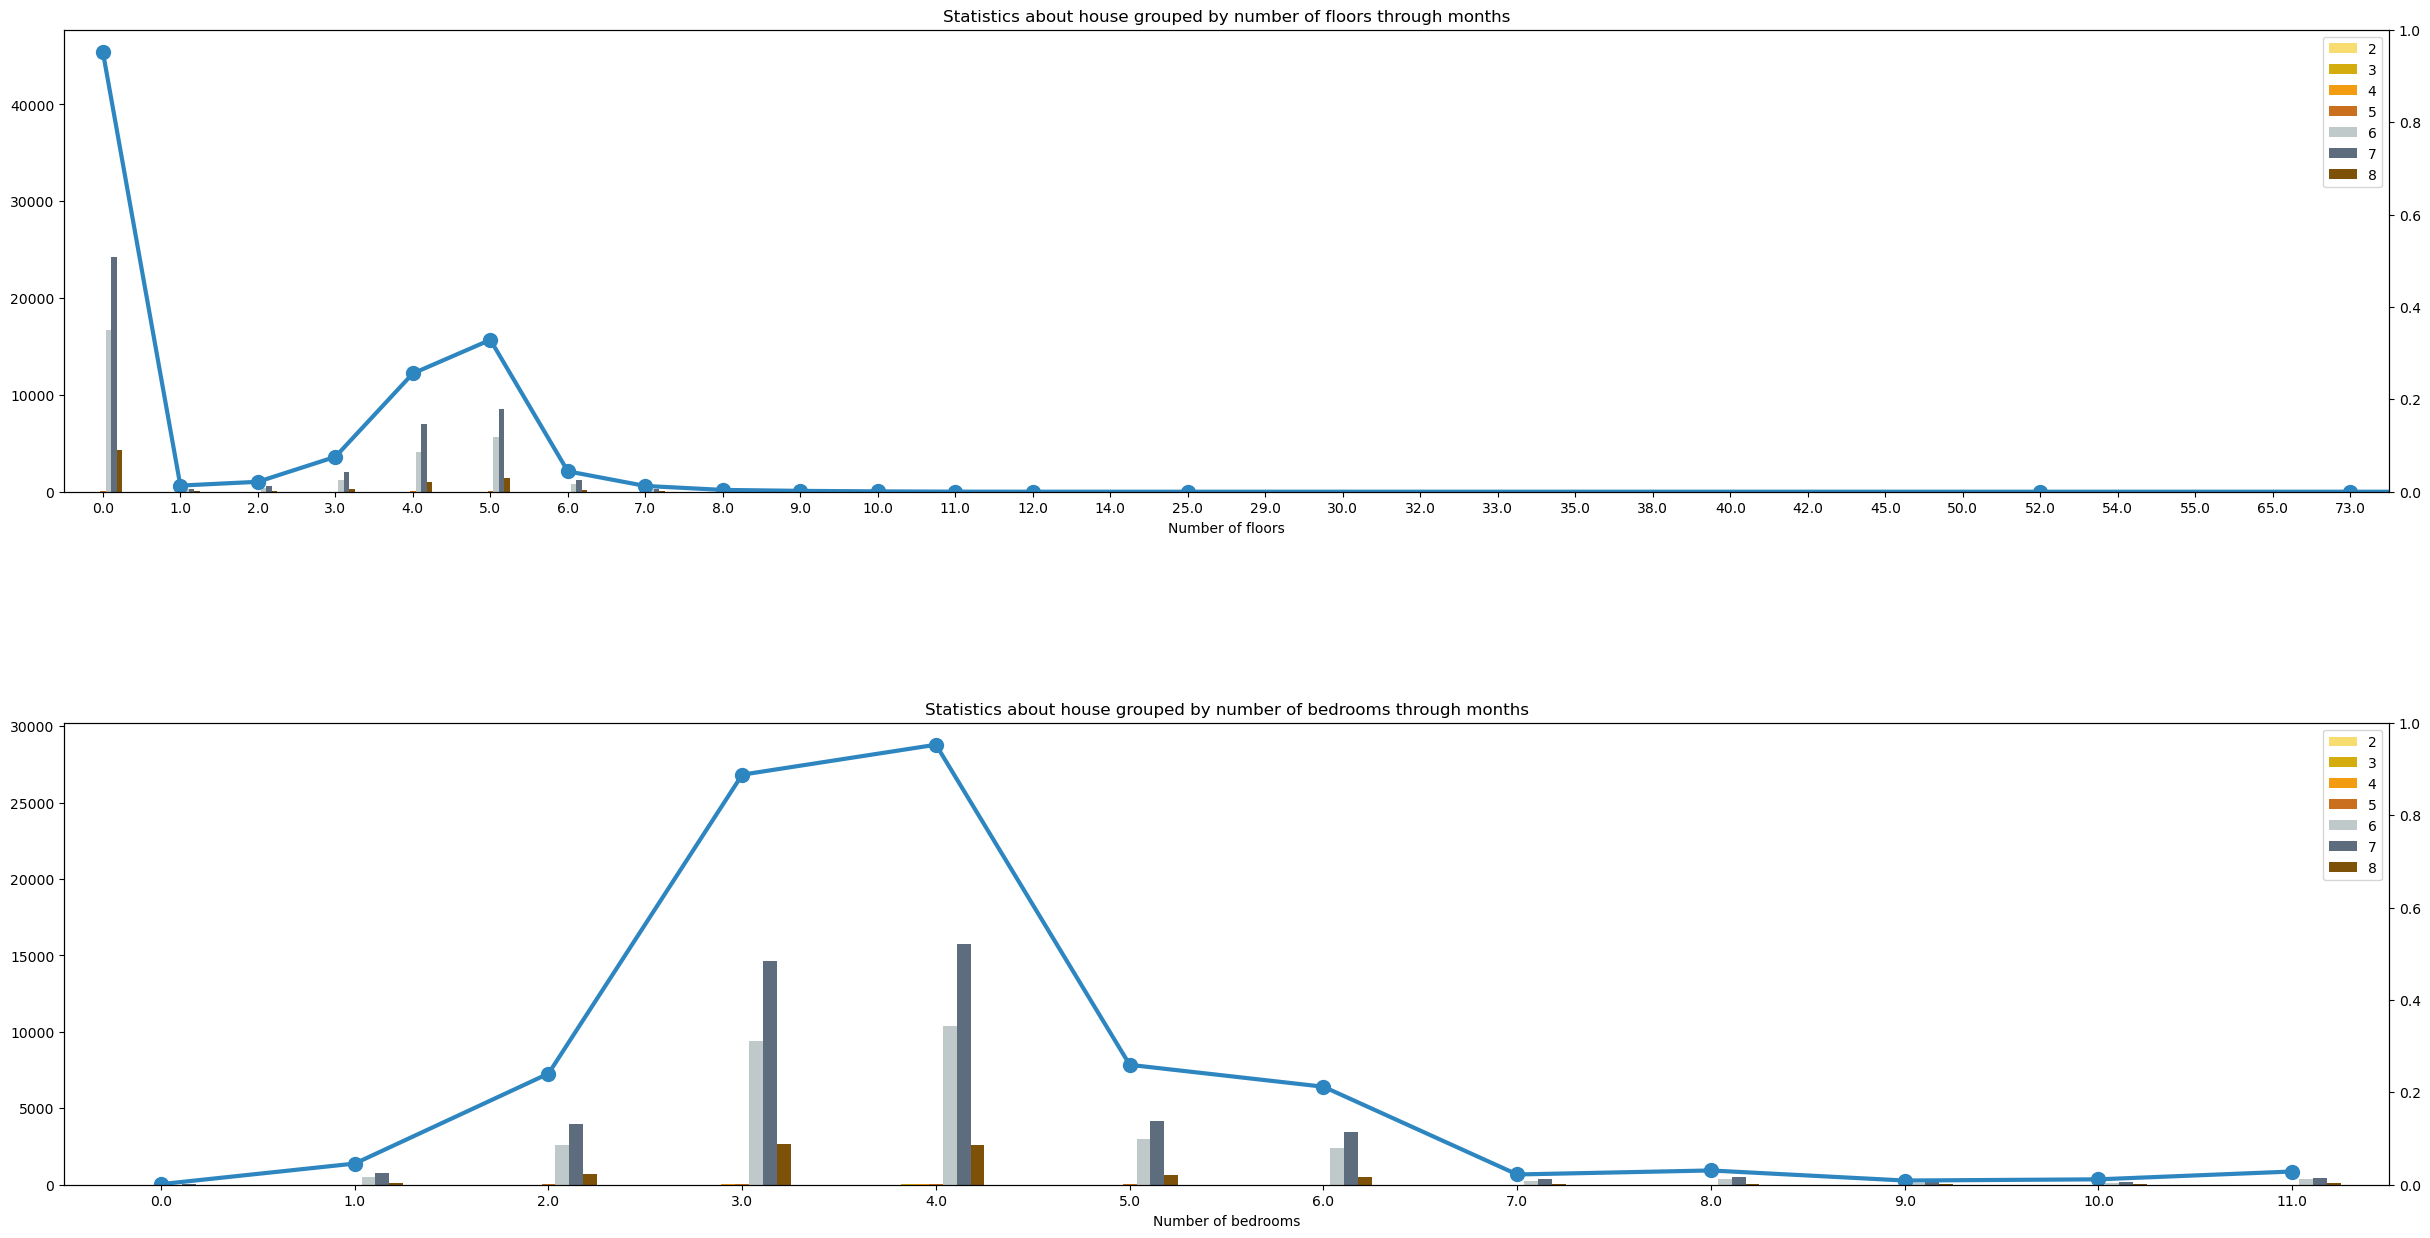

In [21]:
ques02_df_20_floor = ques02_df_20.groupby(['Month'])['Number of floors'].value_counts(sort = True)
ques02_df_20_floor = ques02_df_20_floor.unstack(level = 1).sort_index(ascending = True).transpose()
ques02_df_20_bedrooms = ques02_df_20.groupby(['Month'])['Number of bedrooms'].value_counts(sort = True)
ques02_df_20_bedrooms = ques02_df_20_bedrooms.unstack(level = 1).sort_index(ascending = True).transpose()
line1_df = ques02_df_20['Number of floors'].value_counts().sort_index()
line2_df = ques02_df_20['Number of bedrooms'].value_counts().sort_index()
colors = ['#F7DC6F', '#D4AC0D', '#F39C12', '#CA6F1E', '#BFC9CA', '#5D6D7E', '#7E5109']
# '#F1948A', '#CB4335', '#BB8FCE', '#7D3C98', '#85C1E9', '#2E86C1', '#73C6B6', '#138D75', 
# plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(30, 15))

ques02_df_20_floor.plot.bar(ax = axes[0], rot = 45, color = colors)
axes[0].legend(loc = "upper left", bbox_to_anchor = (1,1))
axes[0].set_title('Statistics about house grouped by number of floors through months')
ax1 = axes[0].twinx()
line1_df.plot.line(ax = axes[0], color = '#2E86C1', linewidth = 3, marker = 'o', markersize = 10)
plt.subplots_adjust(hspace = 0.5)

ques02_df_20_bedrooms.plot.bar(ax = axes[1], rot = 45, color = colors)
axes[1].legend(loc = "upper left", bbox_to_anchor = (1,1))
axes[1].set_title('Statistics about house grouped by number of bedrooms through months')
ax2 = axes[1].twinx()
line2_df.plot.line(ax = axes[1], color = '#2E86C1', linewidth = 3, marker = 'o', markersize = 10)

**Nhận xét:**
- có vẻ 2 bản trên dữ liệu đã rõ ràng vào các căn nhà có số tầng là không xác định hay bằng 0, 3, 4, 5 và số phòng ngủ là 2, 3, 4, 5, 6. Nhìn kỹ vào các cột thì thấy rõ các tháng 6,7,8. <br>

Ta sẽ quan sát kỹ hơn vào cột sau

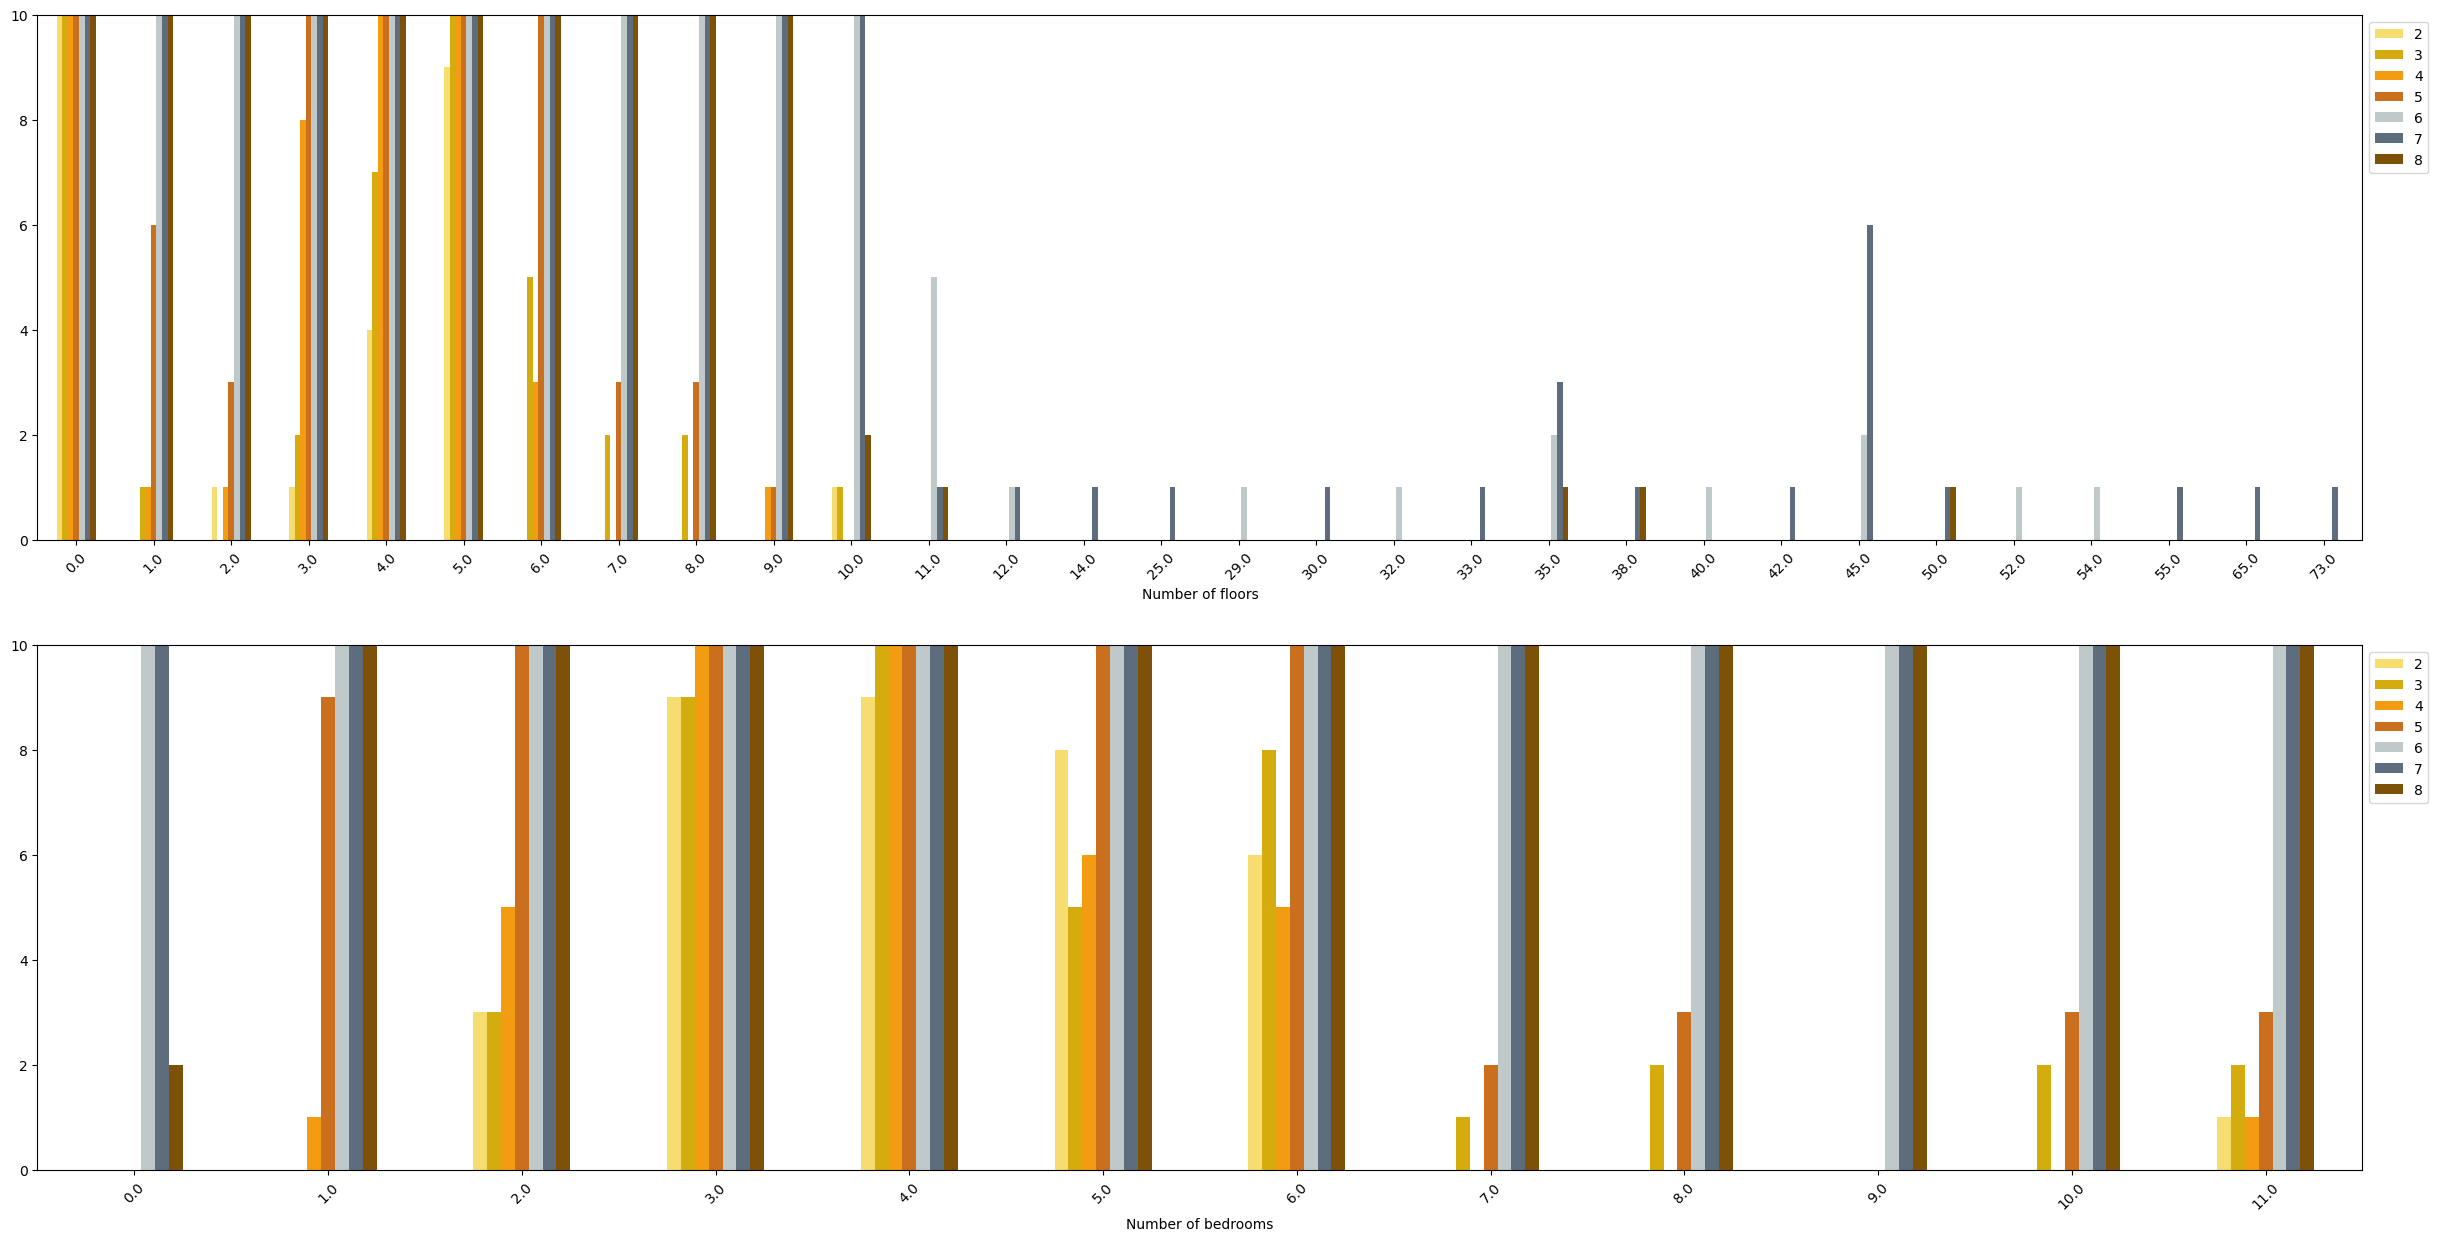

In [27]:
# plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(30, 15))
colors = ['#F7DC6F', '#D4AC0D', '#F39C12', '#CA6F1E', '#BFC9CA', '#5D6D7E', '#7E5109']
ques02_df_20_floor.plot.bar(ax = axes[0], rot = 45, color = colors)
axes[0].set_ylim(0,10)
axes[0].legend(loc = "upper left", bbox_to_anchor = (1,1))

ques02_df_20_bedrooms.plot.bar(ax = axes[1], rot = 45, color = colors)
axes[1].set_ylim(0,10)
axes[1].legend(loc = "upper left", bbox_to_anchor = (1,1))

**Nhận xét:**
- Có vẻ như vào tháng 6 7 8 bùng nổ hơn về dữ liệu, các căn nhà với số tầng và số phòng ngủ đa dạng hơn rất nhiều

**Nhận xét chung:** <br>
- Qua biểu đồ thứ 1 (các căn nhà được định giá/ bán theo số tầng lầu), chúng ta thấy được xu hướng các căn nhà được định giá/ bán rõ ràng hơn. Cụ thể các căn nhà ko có tầng (được xem NaN) được định giá/ bán có số lượng nhiều nhất, sau đó là các căn có 3 đến 6 tầng lầu theo sau. Các số lượng này đều có điểm chung là tăng vọt ở tháng 6 7 8. 
- Qua biểu đồ thứ 2 (các căn nhà được định giá/ bán theo số tầng lầu), chúng ta cũng thấy được rõ xu hướng các căn nhà được định gía/ bán rõ ràng. Chính xác các căn nhà có 2 phòng ngủ cho đến 6 phòng ngủ có số lượng nhiều nhất. Các số lượng đều chung xu hướng là tăng vọt ở tháng 6 7 8.
Vậy qua 2 biểu đồ trên có thể thấy xu hướng được xuất hiện rõ rệt ở tháng 6 7 8. Và thêm dữ liệu mới chỉ lấy được 5 ngày đầu của tháng 8 mà số lượng trên đã thể hiện được tiềm năng tăng vọt sau này. Ta cũng sẽ đoán những căn nhà có 3, 4 phòng ngủ và không xác định tầng hay 0 tầng với 4, 5 tầng sẽ là xu hướng được định giá/ bán sau này.

---

### **Câu 3**: vị trí của các căn nhà có tầm ảnh hưởng như thế nào với giá cả?

- **Khi trả lời câu hỏi thành công:** Ta sẽ biết được vị trí căn nhà nào sẽ đắt đỏ và có thể dự đoán được tiềm năng của của các vị trí căn nhà khác
- **Khó khăn:** Cần phải xử lý lại các giá trị ngoại lai

**Bước 1:** Lấy ra các cột sử dụng cho câu hỏi

In [23]:
cols = ['Address','District', 'Price/m2', 'Area']
ques03_df = house_df[cols]
ques03_df

,Address,District,Price/m2,Area
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,86960000.0,46.0
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,116220000.0,37.0
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,65000000.0,40.0
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,100000000.0,51.0
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,86110000.0,36.0
...,...,...,...,...
81676,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,81580000.0,38.0
81677,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,292000000.0,50.0
81678,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,341460000.0,41.0
81679,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,101670000.0,60.0


**Bước 2:** Tiền xử lý lại các dữ liệu cần phải xử lý <br>
- Scale lại giá trị của price/m2
- Loại bỏ giá trị outlier của price như câu 1 đã gặp.

In [24]:
ques03_df['Price/m2'] = ques03_df['Price/m2'].apply(lambda x: x / 1000000000)
ques03_df = ques03_df.rename(columns= {'Price/m2': 'billion/m2'})
ques03_df = ques03_df.loc[ques03_df['billion/m2'] <= 100000.0]
ques03_df

/var/folders/gg/4_1r0r1n6nn2sslng47v_j180000gn/T/ipykernel_59703/3342344913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques03_df['Price/m2'] = ques03_df['Price/m2'].apply(lambda x: x / 1000000000)


,Address,District,billion/m2,Area
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,0.08696,46.0
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,0.11622,37.0
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,0.06500,40.0
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,0.10000,51.0
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,0.08611,36.0
...,...,...,...,...
81676,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,0.08158,38.0
81677,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,0.29200,50.0
81678,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,0.34146,41.0
81679,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,0.10167,60.0


**Bước 3:** Trực quan hoá dữ liệu

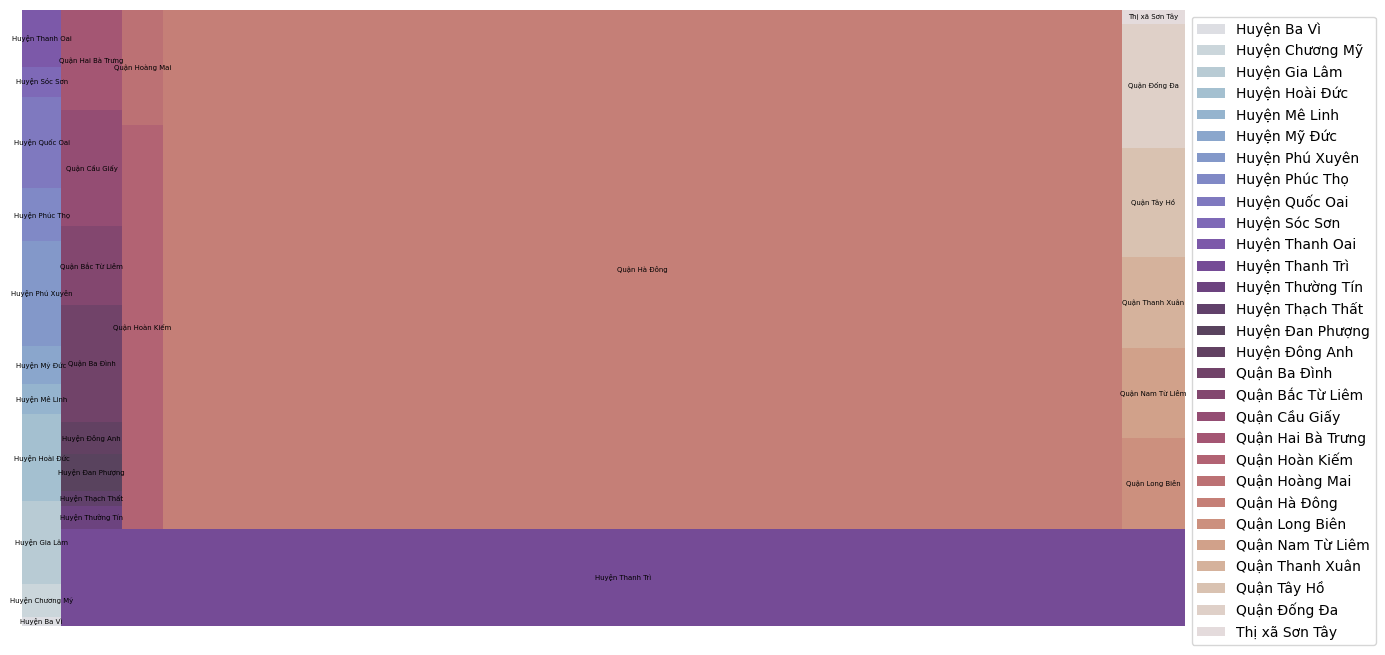

In [25]:
mean_district = ques03_df.groupby(['District'])['billion/m2'].mean()
labels = list(mean_district.index)

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
ax = squarify.plot(sizes= mean_district, 
                    label= mean_district.index,
                    color= sns.color_palette('twilight', len(mean_district)),
                    alpha= 0.8,
                    text_kwargs={'fontsize': 5})
ax.axis('off')

plt.legend(loc = "upper left", bbox_to_anchor = (1,1), handles=ax.containers[0], labels= labels)

plt.show()


**Bước 4:** Ta sẽ thử quan sát thêm về tổng diện tích được định giá/bán

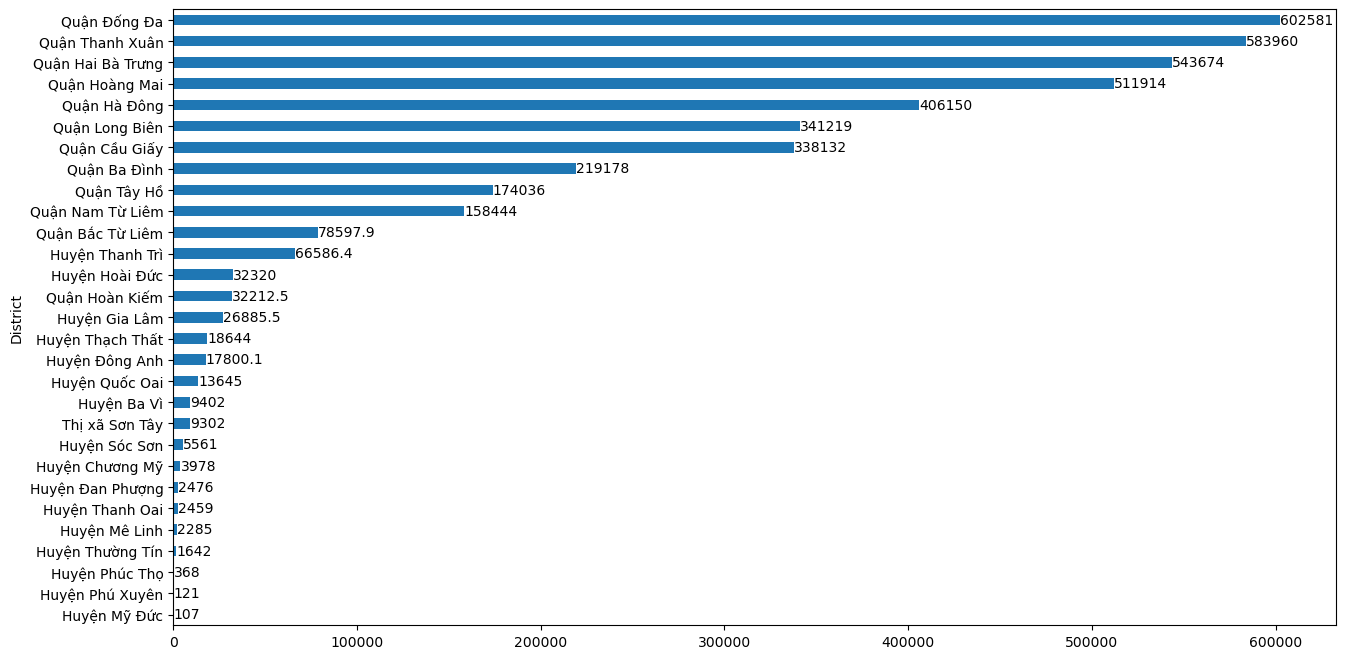

In [26]:
sum_area = ques03_df.groupby(['District'])['Area'].sum().sort_values()

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
sum_area.plot.barh()

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Nhận xét:**
- Ở biểu đồ tree trong bước 3, chúng ta thấy đất ở Quận Hà Đông có giá cả trung bình cao nhất (vượt trội) so với các quận/huyện khác, và đứng nhì là giá đất ở Huyện Thanh Trì. Rẻ nhất chắc chắn là thuộc về Huyện Ba Vì.
- Ở biểu đồ cột ở bước 4, chúng ta thấy diện tích ở Quận Hà Đông lại đứng hạng 5 và huyện Thanh Trì lại đứng hạng 12. Số diện tích được bán ra ở Quận Đống Đa là nhiều nhất.

Qua đây, chúng ta có thể dự đoán rằng Quận Đống Đa, Hai Bà Trưng, Thanh Xuân giá đất vẫn còn rẻ và được rao bán nhiều, có thể đất ở đây sau này tiềm năng chăng? Với diện tích được bán ra nhiều, có cơ hội phát triển với việc giá thành đất còn rẻ rất hợp lý cho các chủ đầu tư